# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** [Christian Ferrone]  
**Date:** [09/12/2025]  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [1]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
getwd()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "/workspaces/assignment-2-Chrstianfrrone/assignment/Homework"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [7]:
# Import the messy sales dataset
messy_sales <- read_csv("../../data/messy_sales_data.csv", show_col_types = FALSE)

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
print(paste("Column names:", paste(names(messy_sales), collapse = ", ")))

[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"
[1] "Column names: TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity"


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [8]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

In [ ]:
**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [Look for NA values - which columns have missing data?]

2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?]

3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?]

4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?]

5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]

**YOUR OBSERVATIONS:**

[1. Customer_name and purchase_date both have one missing value in row one. 2. Sales_amount has a value
of 5000 in row four and Quantity has a value of 100 in row five, both of which seem extreme. 3. Product_category
has inconsistent capitalization in 'electronics' and 'Electronics'. 4. Both Purchase_date and sales_amount are 
using appropriate data types as a date and numeric respectively. 5. In Quantity there is a -1 value in row
three which is impossible and a quantity of 0 in row 7 which doesn't make sense in a sales dataset.]

---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [10]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# TODO: Calculate missing values per column
missing_per_column <- colSums(is.na(messy_sales))
# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"
# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8

In [18]:

cleaned_sales_A <- na.omit(messy_sales)

print(paste("Original dataset rows:", nrow(messy_sales)))
print(paste("After removal, rows:", nrow(cleaned_sales_A)))

summary(cleaned_sales_A)

[1] "Original dataset rows: 200"
[1] "After removal, rows: 156"


 TransactionID    Customer_Name      Product_Category    Sales_Amount      
 Min.   :  2.00   Length:156         Length:156         Min.   :   -56.72  
 1st Qu.: 52.75   Class :character   Class :character   1st Qu.:   361.79  
 Median :103.50   Mode  :character   Mode  :character   Median :   537.48  
 Mean   :101.20                                         Mean   :  1729.00  
 3rd Qu.:150.50                                         3rd Qu.:   715.74  
 Max.   :200.00                                         Max.   :100000.00  
 Purchase_Date           Quantity     
 Min.   :2023-01-06   Min.   : -1.00  
 1st Qu.:2023-03-25   1st Qu.:  2.00  
 Median :2023-07-04   Median :  5.00  
 Mean   :2023-06-25   Mean   : 13.59  
 3rd Qu.:2023-09-12   3rd Qu.:  8.25  
 Max.   :2023-12-28   Max.   :100.00  

In [19]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales)

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [20]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [24]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  y <- v[is.na(v)]
  u <- unique(y)
  u[which.max(tabulate(match(y, u )))]
}

In [26]:
# TODO: Impute Customer_Name with mode (for categorical missing values)
mode_customer <- get_mode(sales_imputed$Customer_Name)
sales_imputed$Customer_Name[is.na(sales_imputed$Customer_Name)] <- mode_customer


In [29]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
med_qty <- median(sales_imputed$Quantity, na.rm = TRUE)
sales_imputed$Quantity[is.na(sales_imputed$Quantity)] <- med_qty

In [30]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 


In [33]:
summary(messy_sales$Sales_Amount)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [34]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [35]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [36]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why? **

I'd go with imputation because removing rows cuts out too much data. By filling in the missing values with something like median or mode you keep more of the dataset intact.  

2. **What are the trade-offs between removal and imputation?**

For removal, it is more simple but it also more risky if too many rows are lost. For imputation it keeps the dataset intact but introduces "guessed" values that may not be accurate.

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [37]:
"#### 3.1 Outlier Detection Using IQR Method
",

Apply the interquartile range method to identify outliers in Sales_Amount.

ERROR: Error in parse(text = input): <text>:2:2: unexpected ','
1: "#### 3.1 Outlier Detection Using IQR Method
2: ",
    ^


In [38]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)
IQR_sales <- IQR(sales_imputed$Sales_Amount, na.rm = TRUE)

In [39]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q1_sales - 1.5 * IQR_sales
lower_threshold <- Q3_sales + 1.5 * IQR_sales

In [40]:
### TODO: Identify outliers
outliers <- sales_imputed[sales_imputed$Sales_Amount < lower_threshold | sales_imputed$Sales_Amount > upper_threshold, ]

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: 1192.33084353087"
[1] "Upper threshold: -135.273443054502"
[1] "Number of outliers found: 200"
[1] "Outlier rows:"
# A tibble: 200 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2             2 Alice Brown   Clothing                 573. 2023-10-21   
 3             3 Jane Doe      Electronics              488. 2023-12-28   
 4             4 Jane Doe      Electronics             5000  2023-06-16   
 5             5 John Smith    Books                    344. 2023-05-05   
 6             6 John Smith    Books                    435. 2023-11-28   
 7             7 Jane Doe      Home                     489. 2023-08-17   
 8             8 Jane Doe      Electronics              537. 2023-05-17   
 9         

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


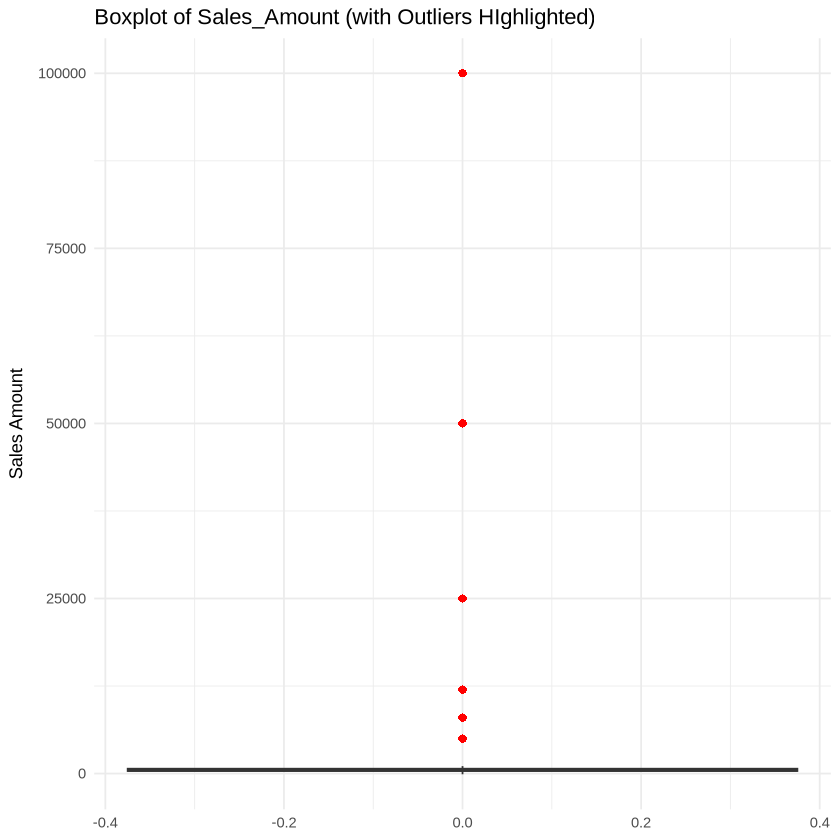

In [43]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) + 
  geom_boxplot(outlier.colour = "red", outlier.shape = 16, outlier.size = 2) +
  labs(title = "Boxplot of Sales_Amount (with Outliers HIghlighted)",
         y = "Sales Amount") +
    theme_minimal()
# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [44]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed[sales_imputed$Sales_Amount >= lower_threshold &
sales_imputed$Sales_Amount <= upper_threshold, ]

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 22"
[1] "Rows removed: 178"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

In [ ]:
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- # YOUR CODE HERE
# Hint: ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Sales Amount Outliers")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [47]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- # YOUR CODE HERE
# Hint: Use filter() to keep only rows within the threshold bounds

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: "
[1] "Rows removed: "


In [ ]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

In [53]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(
    sales_imputed$Sales_Amount < lower_threshold, lower_threshold,
    ifelse(sales_imputed$Sales_Amount > upper_threshold, upper_threshold, sales_imputed$Sales_Amount))

In [48]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1]   -100 100000


In [49]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped[sales_outliers_capped$Sales_Amount < lower_threshold | sales_outliers_capped$Sales_Amount > upper_threshold, ]
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 200"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [54]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -135.3  1192.3  1192.3  1147.6  1192.3  1192.3      22 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

[I chose the sales_outliers_capped dataset because it keeps the whole sample size while fixing outliers. This will make the data cleaner without losing any important information.]

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [55]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric  Original_Data     Final_Data
1      Number of Rows            200            200
2      Missing Values             52             52
3   Mean Sales_Amount        1614.91        1147.58
4 Median Sales_Amount         531.29        1192.33
5            Outliers Check manually Check manually


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

[I'd prefer removing rows when the dataset is very large and the missing values are few. For smaller datasets, I'd go with imputation to keep aa much data as possible.]]

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

Outliers could represent bulk purchases, system errors, or rare but valid transactions. They shouldn't be removed if they represent real business transactions because that's real data that can be used. If it is an error it should be removed.

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

Missing values annd outliers can mess up averages by dragging them up or down. This can create misleading insights. One giant outlier could make the average sales look way higher than it really is.

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

It's important to be transparent when cleaning any data because removing or editing could change results. Analysts should document every change and how they handled missing values or outliers so others can properly view the data and results.

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**